# Introduction to python

This notebook is an introduction to python and its use in data science (for example). It is split into 2 parts: 
1. [Python basics](#p1)<br>
2. [Example](#p2)<br>
    2.1 [Exploratory data analysis (EDA)](#pA)<br>
    2.2 [Building a model](#pB)<br>
    2.3 [Using a model](#pC)<br>

<a id='p1'></a>
## 1. Python basics

In [1]:
print('hello world')

hello world


In [2]:
path = './data/'
fname = 'fruits.txt'

In [3]:
import pandas as pd

In [4]:
1 + 1

2

In [5]:
# Use hastag to comment! 

In [6]:
10 ** 2

100

In [7]:
10 / 2

5.0

In [8]:
myint = 1

In [9]:
"this is a test" + " that is not true"

'this is a test that is not true'

In [10]:
import sys
print(sys.getsizeof(1))

28


<a id='p2'></a>
## 2. Example

In this example we try to classify fruits based on the following properties: 
- mass
- width
- height
- color

The following fruits are contained in the data: 
- apple
- mandarin
- lemon
- orange

<a id='pA'></a>
### 2.1. Exploratory data analysis (EDA)

#### Load data

In [11]:
import pandas as pd

In [12]:
fruits = pd.read_table(path + fname)

In [13]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
...,...,...,...,...,...,...,...
59,4,lemon,unknown,116.0,6.1,NaN,0.71
60,4,lemon,unknown,NaN,6.3,7.7,0.72
61,4,lemon,unknown,116.0,NaN,8.1,0.73
62,4,lemon,unknown,152.0,6.5,NaN,0.72


In [14]:
fruits.shape

(64, 7)

In [15]:
fruits.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass             float64
width            float64
height           float64
color_score      float64
dtype: object

#### Clean data

In [16]:
fruits.isnull().values.any()

True

In [17]:
fruits = fruits.dropna(how='any',axis=0) 
fruits.isnull().values.any()

False

In [18]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
5,2,mandarin,mandarin,80.0,5.8,4.3,0.77
6,2,mandarin,mandarin,80.0,5.9,4.3,0.81
7,2,mandarin,mandarin,76.0,5.8,4.0,0.81
8,1,apple,braeburn,178.0,7.1,7.8,0.92
9,1,apple,braeburn,172.0,7.4,7.0,0.89


#### Quick stats

In [19]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [20]:
fruits["fruit_label"].value_counts()

1    19
3    19
4    16
2     5
Name: fruit_label, dtype: int64

In [21]:
column = "fruit_label"
fruits[column].value_counts()

1    19
3    19
4    16
2     5
Name: fruit_label, dtype: int64

In [22]:
fruits["fruit_name"].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

#### For loop

In [23]:
counter = 0
for fruit in fruits["fruit_name"].unique(): 
    print(fruit)
    counter += 1
    print(counter)

apple
1
mandarin
2
orange
3
lemon
4


In [24]:
for fruit in fruits["fruit_name"].unique():
    where = (fruits["fruit_name"] == fruit)
    temp_df = fruits[where]
    print('Describe for: ' + fruit)
    print(temp_df.describe())

Describe for: apple
       fruit_label        mass      width     height  color_score
count         19.0   19.000000  19.000000  19.000000    19.000000
mean           1.0  165.052632   7.457895   7.342105     0.783684
std            0.0   11.969747   0.345311   0.291196     0.124196
min            1.0  140.000000   6.900000   6.800000     0.550000
25%            1.0  156.000000   7.300000   7.100000     0.690000
50%            1.0  164.000000   7.400000   7.300000     0.840000
75%            1.0  172.000000   7.600000   7.550000     0.880000
max            1.0  192.000000   8.400000   7.900000     0.930000
Describe for: mandarin
       fruit_label       mass     width    height  color_score
count          5.0   5.000000  5.000000  5.000000     5.000000
mean           2.0  81.200000  5.940000  4.380000     0.796000
std            0.0   3.898718  0.167332  0.277489     0.016733
min            2.0  76.000000  5.800000  4.000000     0.770000
25%            2.0  80.000000  5.800000  4.30000

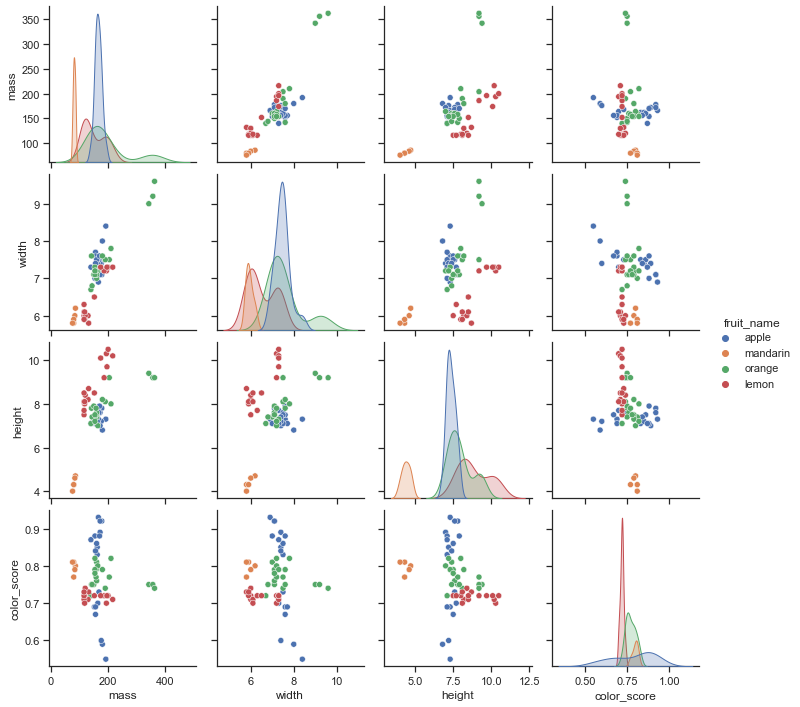

In [25]:
import seaborn as sns
col = ['fruit_name','mass', 'width', 'height', 'color_score']
sns.set_theme(style="ticks")
sns.pairplot(fruits[col], hue="fruit_name")

<a id='pB'></a>
### 2.2. Building a model

In [26]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


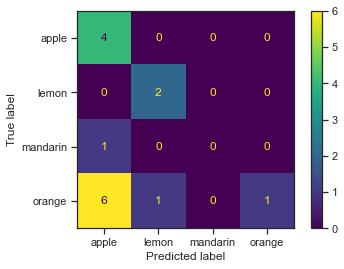

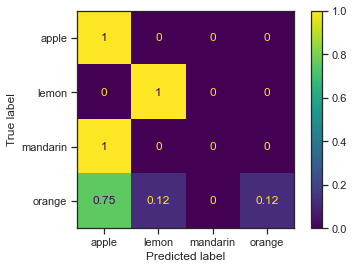

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg, X_test, y_test)  
plot_confusion_matrix(logreg, X_test, y_test,normalize='true')  

<ipython-input-31-9365a6e11aa4>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


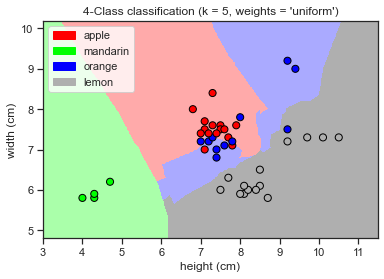

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    knn = KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X_mat, y_mat)
    
    # Plot the decision boundary by assigning a color in the color map
        # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
               % (n_neighbors, weights))    
    
plot_fruit_knn(X_train, y_train, 5, 'uniform')

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.53


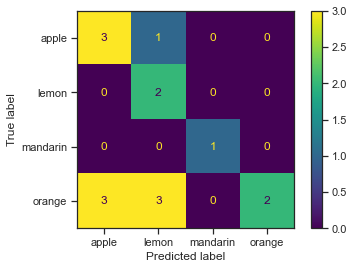

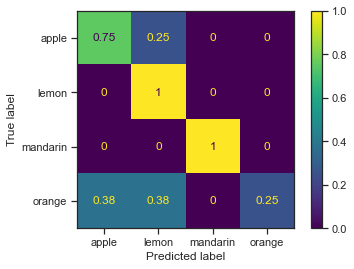

In [32]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

plot_confusion_matrix(knn, X_test, y_test)  
plot_confusion_matrix(knn, X_test, y_test,normalize='true')  

<a id='pC'></a>
### 2.3 Using a model

In [33]:
knn

KNeighborsClassifier()

In [34]:
fruits.iloc[X_test.index]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
26,3,orange,spanish_jumbo,362.0,9.6,9.2,0.74
35,3,orange,turkey_navel,150.0,7.1,7.9,0.75
43,4,lemon,spanish_belsan,194.0,7.2,10.3,0.70
28,3,orange,selected_seconds,140.0,6.7,7.1,0.72
11,1,apple,braeburn,172.0,7.1,7.6,0.92
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
34,3,orange,turkey_navel,142.0,7.6,7.8,0.75
46,4,lemon,spanish_belsan,216.0,7.3,10.2,0.71
40,3,orange,turkey_navel,154.0,7.1,7.5,0.78
22,1,apple,cripps_pink,140.0,7.3,7.1,0.87


In [35]:
new_fruit = pd.DataFrame([[50, 5, 5, 0.79]])
prediction = knn.predict(new_fruit)
prediction

array(['mandarin'], dtype=object)

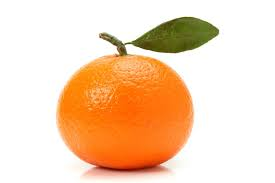

In [36]:
from IPython.display import Image
Image(filename='data/'+ prediction[0] + '.jpg')